In [2]:
import nibabel as nib

In [3]:
nii = nib.load("img0001.nii")

print(nii)


<class 'nibabel.nifti1.Nifti1Image'>
data shape (501, 501, 501)
affine:
[[-0.40000001  0.          0.         -0.        ]
 [ 0.         -0.40000001  0.         -0.        ]
 [ 0.          0.          0.40000001  0.40000001]
 [ 0.          0.          0.          1.        ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 501 501 501   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.  0.4 0.4 0.4 0.  0.  0.  0. ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin   

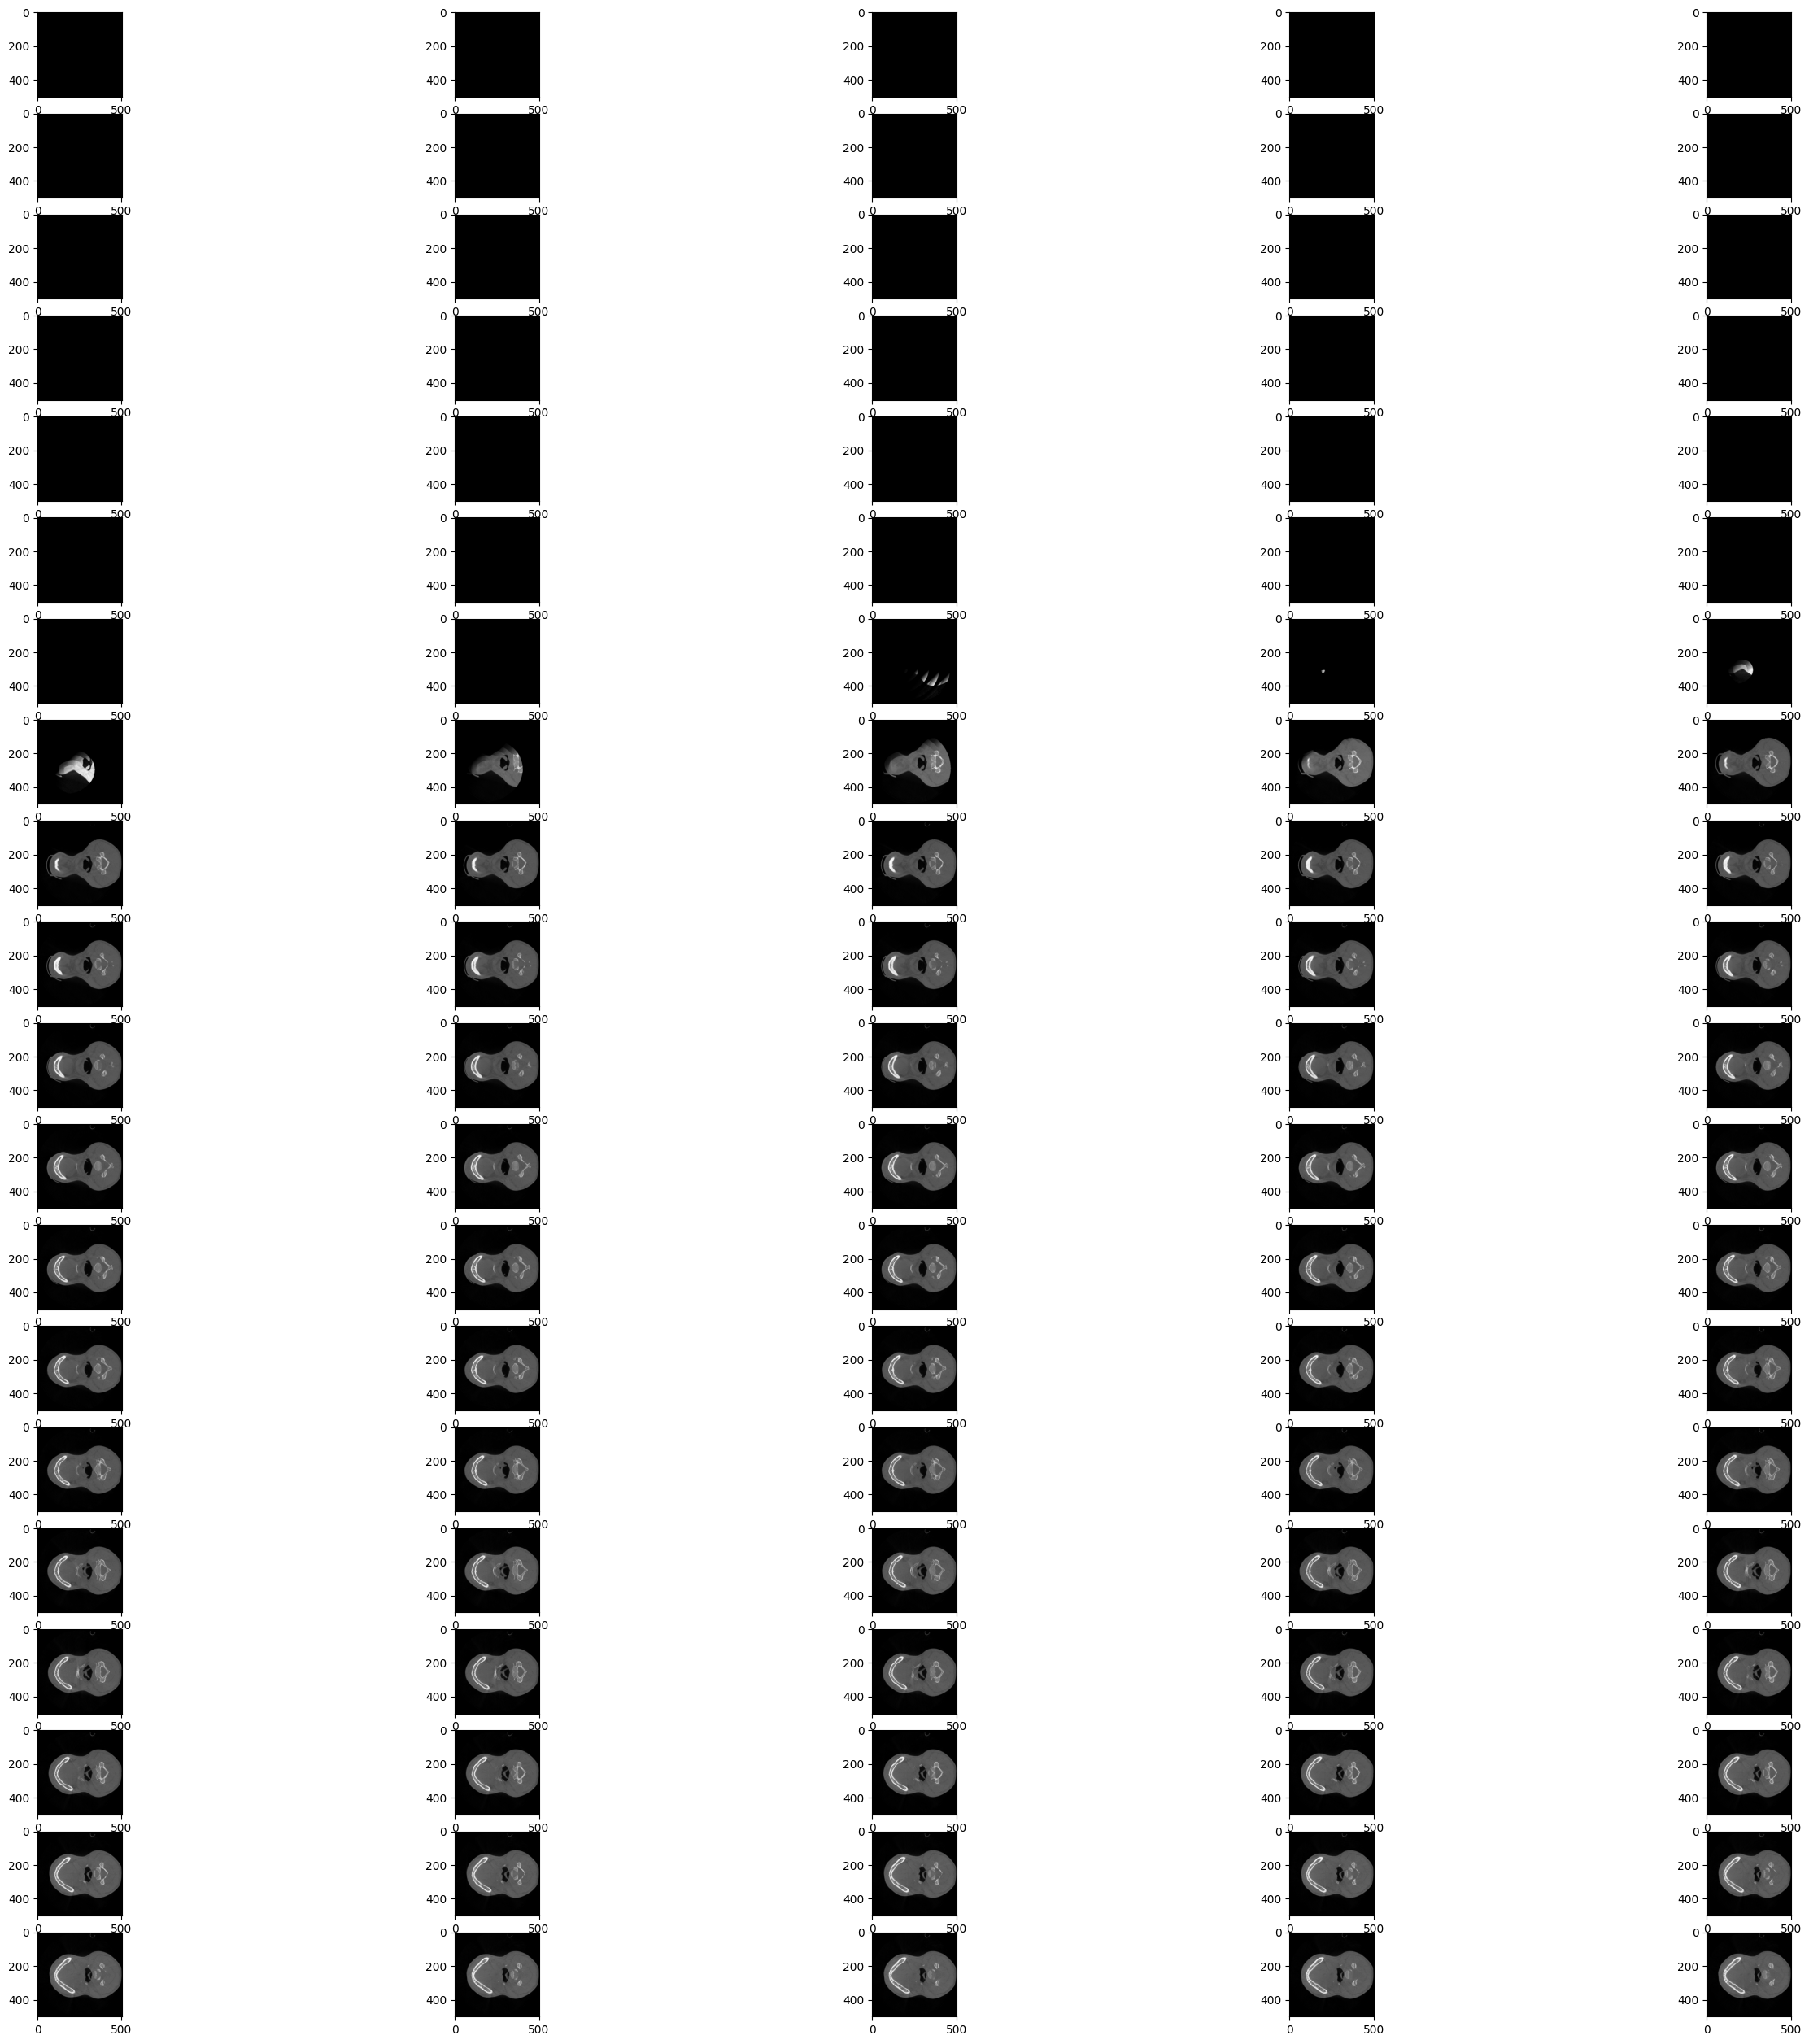

In [5]:
import matplotlib.pyplot as plt
plt.style.use('default')
fig, axes = plt.subplots(20, 5, figsize=(32,32))
for i, ax in enumerate(axes.reshape(-1)):
    ax.imshow(img[:,:,1 + i], cmap='gray')
plt.show()

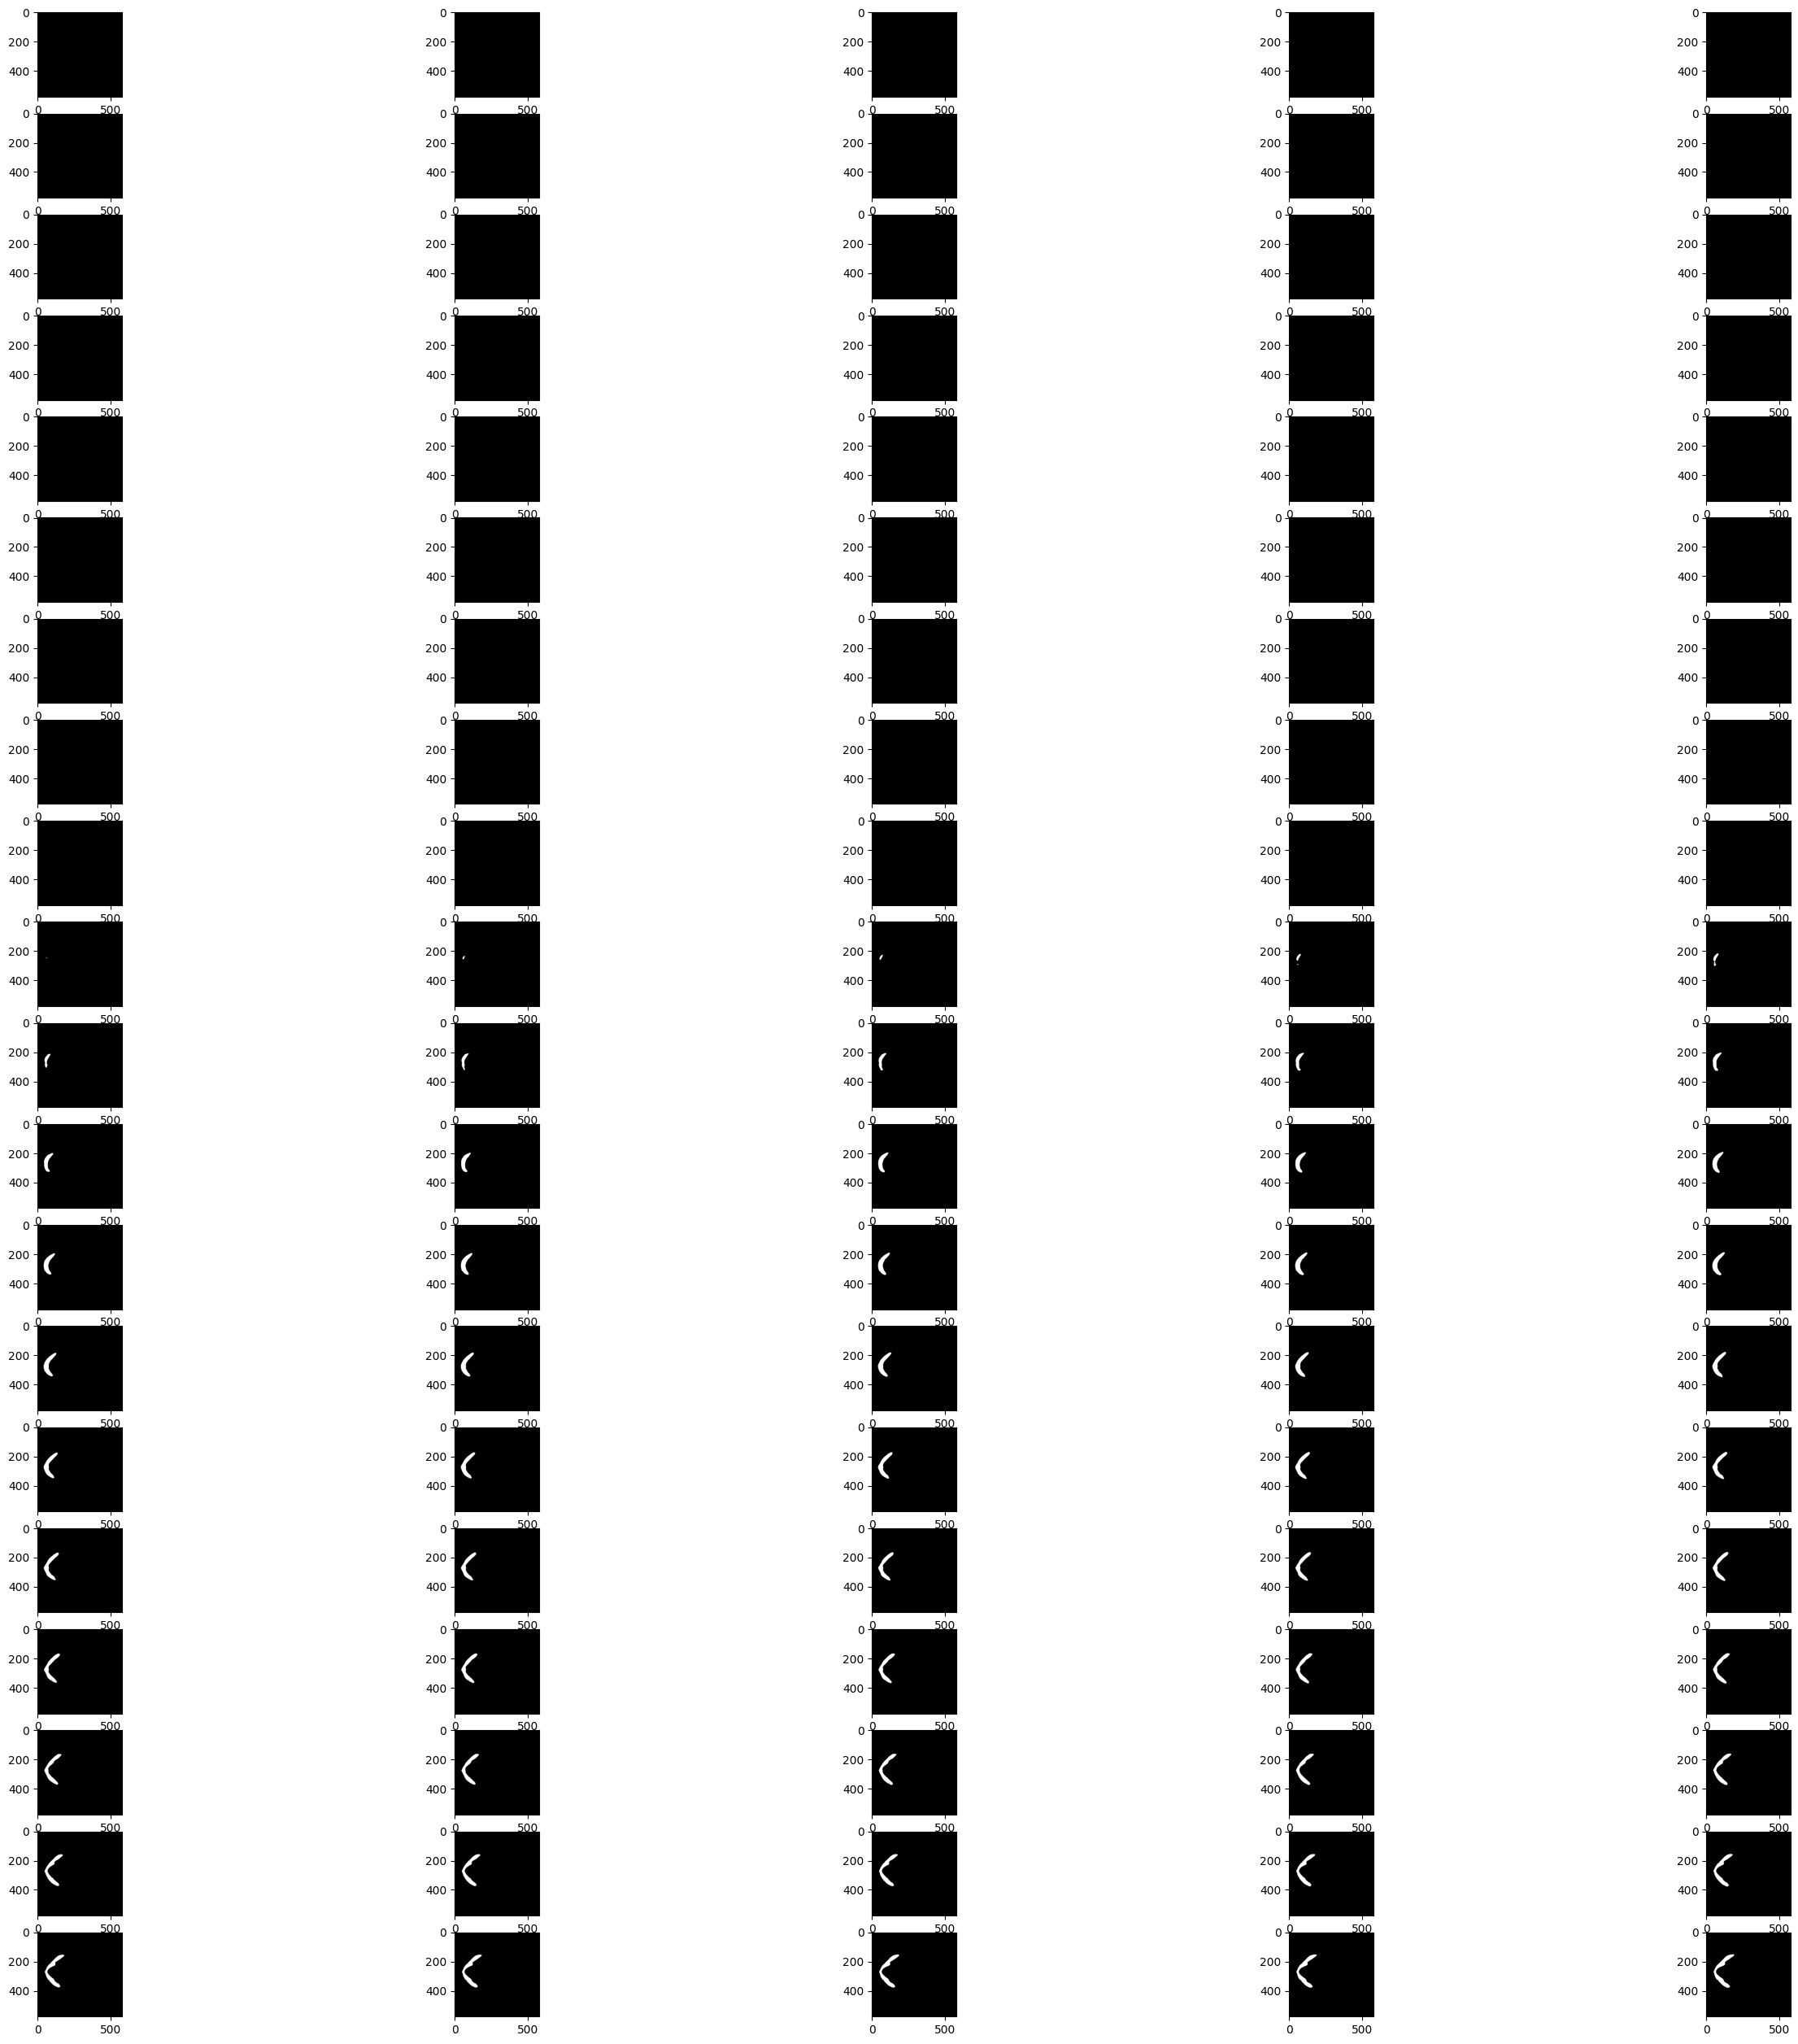

In [6]:
nii_labeled = nib.load("label0005.nii")
img_labeled = nii_labeled.get_fdata()

fig, axes = plt.subplots(20, 5, figsize=(32,32))

for i, ax in enumerate(axes.reshape(-1)):
    ax.imshow(img_labeled[:,:,1 + i], cmap='gray')
plt.show()


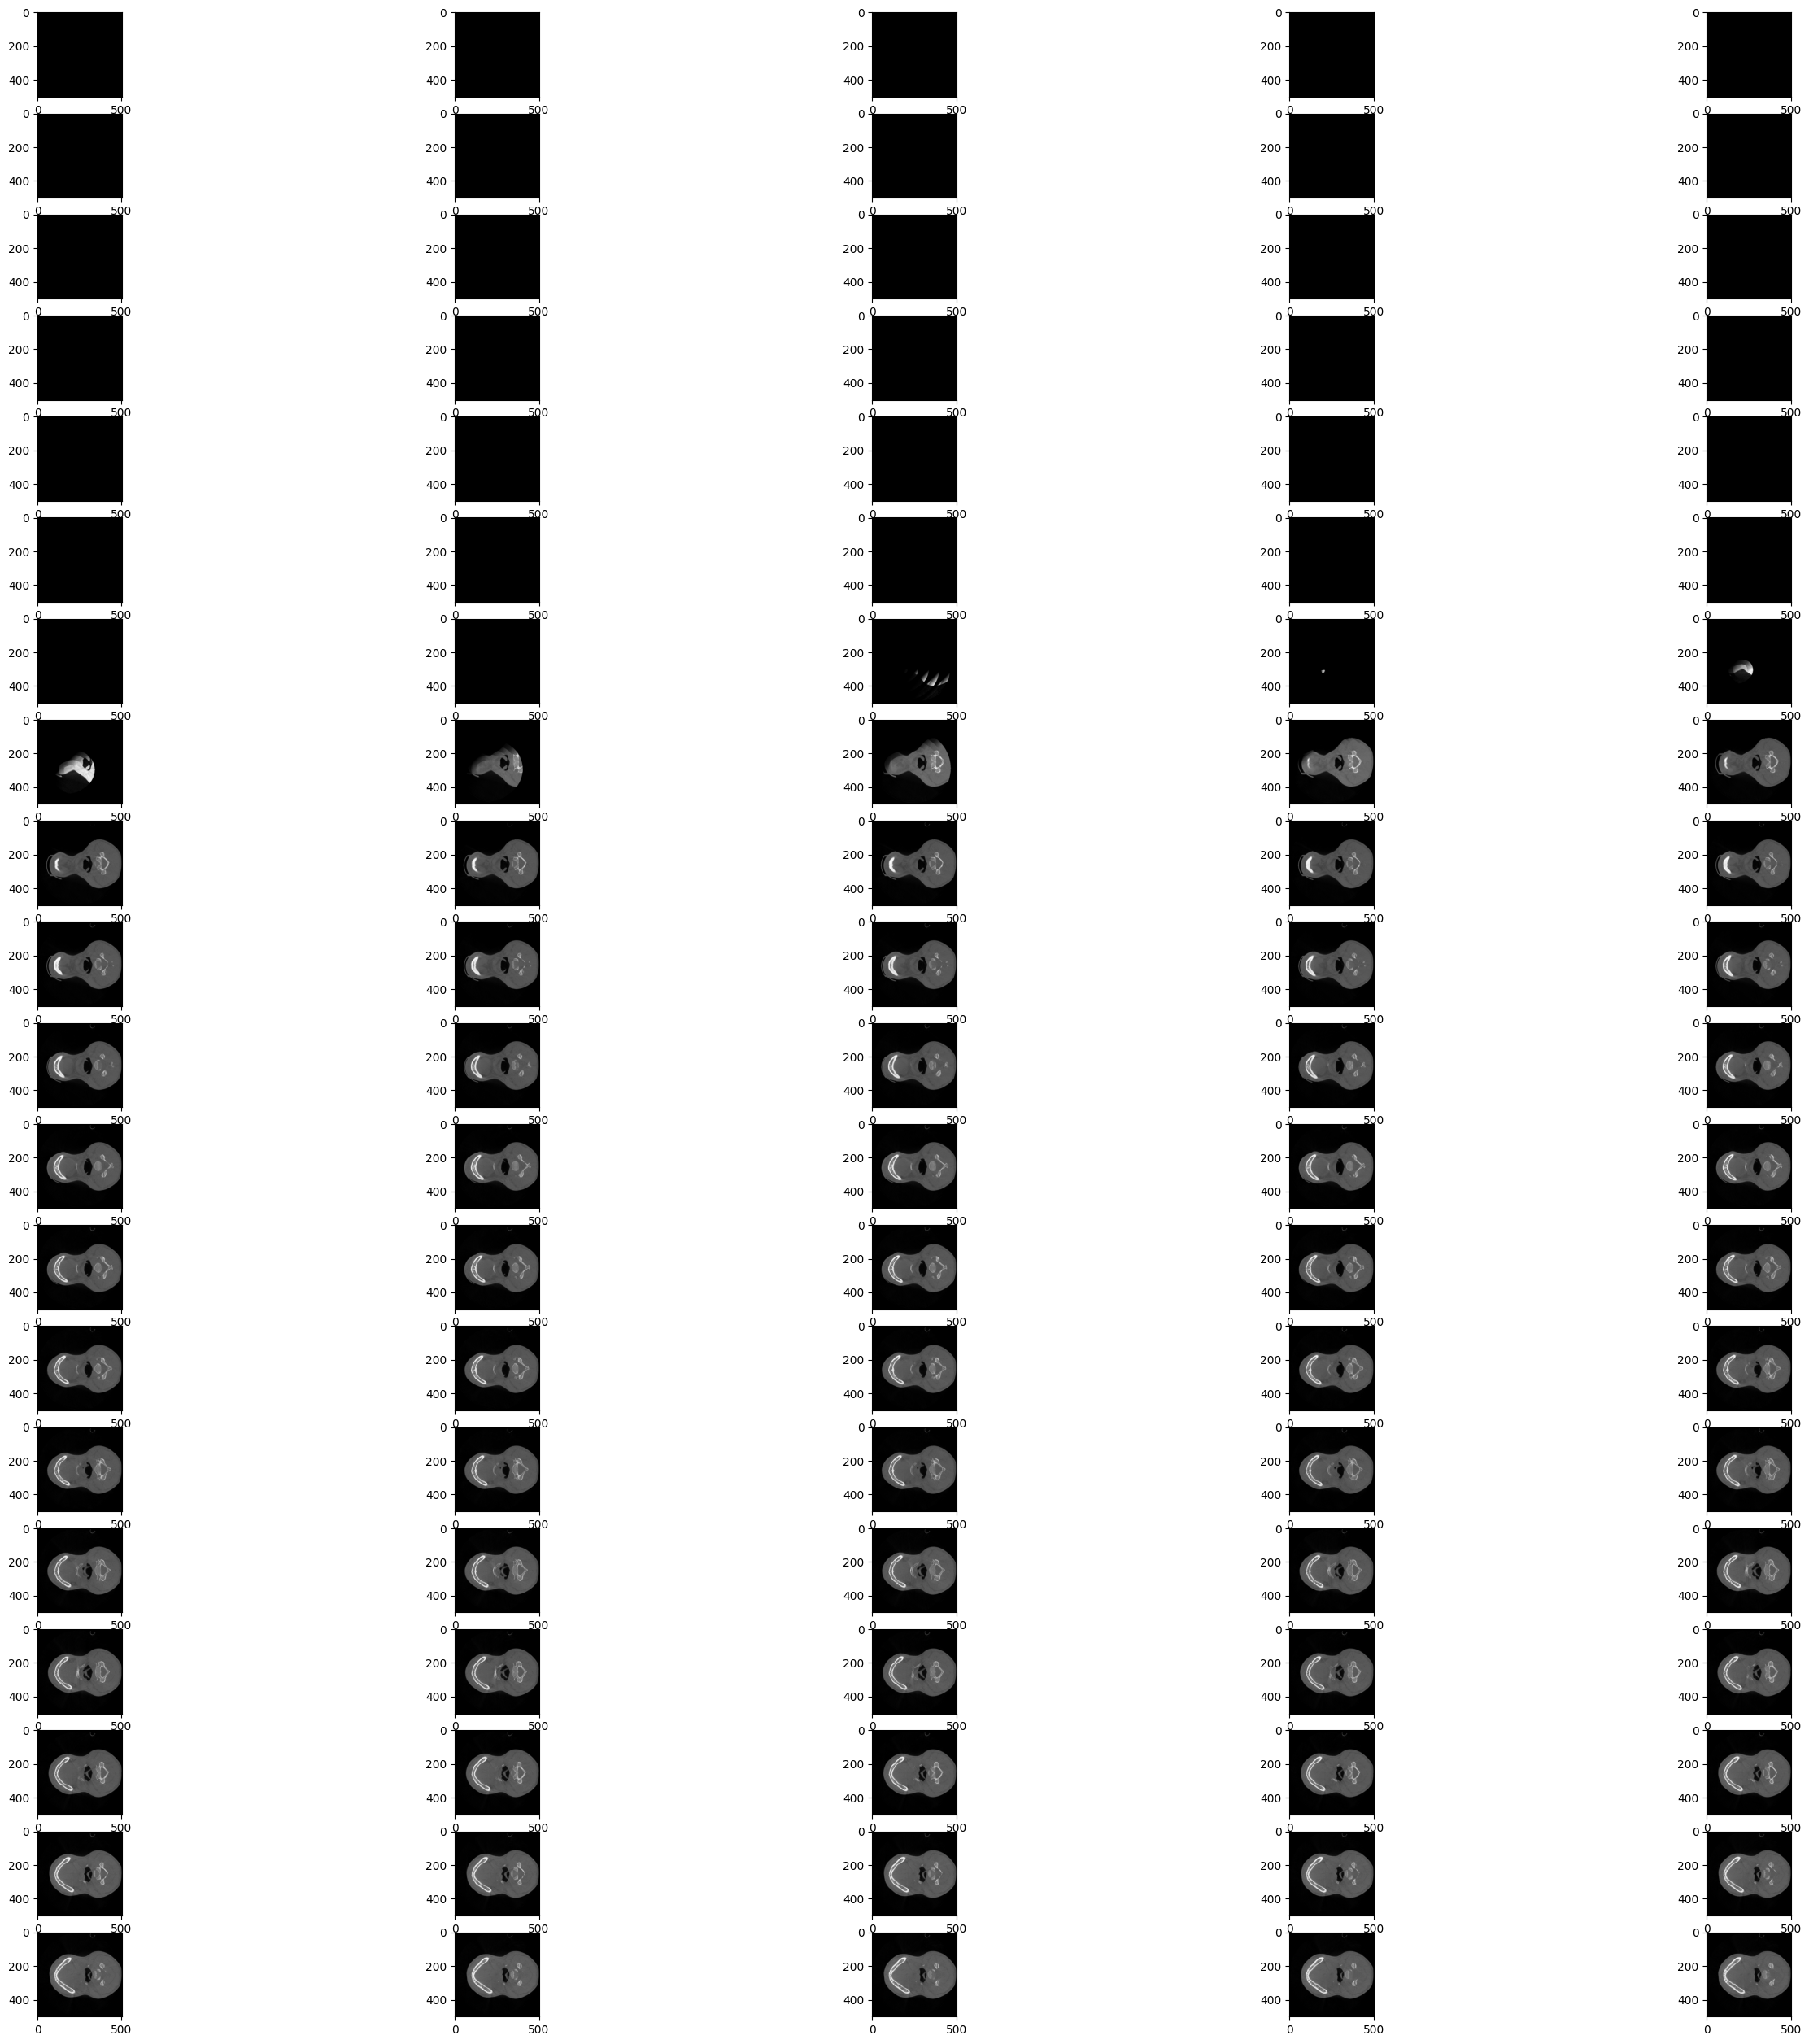

In [7]:
# normalize the image

img = (img - img.min()) / (img.max() - img.min())

fig, axes = plt.subplots(20, 5, figsize=(32,32))
for i, ax in enumerate(axes.reshape(-1)):
    ax.imshow(img[:,:,1 + i], cmap='gray')

In [49]:
# check null values
import numpy as np

# stack to 3D
img = np.stack([img]*3, axis=-1)

In [53]:
import numpy as np
import cv2


out = cv2.VideoWriter('project.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, (img.shape[1], img.shape[0]))

for i in range(img.shape[2]):
    out.write((img[:,:,i]*255).astype(np.uint8))
out.release()


In [54]:
nii_labeled = nib.load("label0005.nii")
img_labeled = nii_labeled.get_fdata()

img_labeled = (img_labeled - img_labeled.min()) / (img_labeled.max() - img_labeled.min())

img_labeled = np.stack([img_labeled]*3, axis=-1)

out = cv2.VideoWriter('project_labeled.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, (img_labeled.shape[1], img_labeled.shape[0]))

for i in range(img_labeled.shape[2]):
    out.write((img_labeled[:,:,i]*255).astype(np.uint8))
out.release()


In [55]:
import os

def convert_avi_to_mp4(avi_file_path, output_name):
    os.popen("ffmpeg -i '{input}' -ac 2 -b:v 2000k -c:a aac -c:v libx264 -b:a 160k -vprofile high -bf 0 -strict experimental -f mp4 '{output}.mp4'".format(input = avi_file_path, output = output_name))
    return True


In [57]:
convert_avi_to_mp4("project.avi", "project")
convert_avi_to_mp4("project_labeled.avi", "project_labeled")

True

In [1]:
def get_arrays_by_plot(arr1: np.ndarray, arr2: np.ndarray, title1: str = None, title2: str = None) -> np.ndarray:
    """
    Display two arrays as images side by side in a plot.

    Parameters:
    arr1 (ndarray): The first array to be displayed as an image.
    arr2 (ndarray): The second array to be displayed as an image.
    title1 (str, optional): The title for the first image. Defaults to None.
    title2 (str, optional): The title for the second image. Defaults to None.

    Returns:
    ndarray: The image of the plot as a NumPy array.
    """
    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(arr1, cmap='gray')
    ax[1].imshow(arr2, cmap='gray')
      
    if title1:
        ax[0].set_title(title1)
    if title2:
        ax[1].set_title(title2)
        
    fig.canvas.draw()
        
    buf = fig.canvas.buffer_rgba()
    img = np.frombuffer(buf, np.uint8).reshape((buf.shape[0], buf.shape[1], 4))
    
    return img

NameError: name 'np' is not defined